S was equal to = 2.0280000000000005 , at theta value:  3.4000000000000004


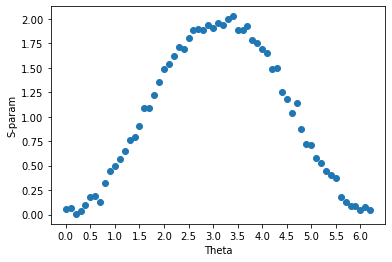

In [25]:
#prepared by:
#Youssef Hamdy Abdelmoneim Attallah 46-5543
#Omar Ahmed Altantawy 46-8626
import numpy as np
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

simulator = AerSimulator()

q = QuantumRegister(3)

circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)

def e1(quantum_circuit, theta):
    circuit = quantum_circuit.copy()
    circuit.ry(theta, 1)
    #circuit.measure([0, 1], [0, 1])
    circuit.measure(0,0)
    circuit.measure(1,1)
    #circuit.measure(2,2)
    circuit1 = transpile(circuit, simulator)
    job = simulator.run(circuit1, shots=1000)
    counts = job.result().get_counts(circuit1)
    #print(counts)
    return ret_e(counts)


def e2(quantum_circuit, theta):
    circuit = quantum_circuit.copy()
    circuit.ry(-theta, 1)
    #circuit.measure([0, 1], [0, 1])
    circuit.measure(0,0)
    circuit.measure(1,1)
    #circuit.measure(2,2)
    circuit1 = transpile(circuit, simulator)
    job = simulator.run(circuit1, shots=1000)
    counts = job.result().get_counts(circuit1)
    #print(counts)
    return ret_e(counts)

def e3(quantum_circuit, theta):
    circuit = quantum_circuit.copy()
    circuit.h(0)
    circuit.ry(theta, 1)
    circuit.h(2)
    #circuit.measure([0, 1], [0, 1], [0, 1])
    circuit.measure(0,0)
    circuit.measure(1,1)
    circuit.measure(2,2)
    #circuit.measure_all()
    circuit1 = transpile(circuit, simulator)
    job = simulator.run(circuit1, shots=1000)
    counts = job.result().get_counts(circuit1)
    #print(counts)
    return ret_e(counts)

def e4(quantum_circuit, theta):
    circuit = quantum_circuit.copy()
    circuit.h(0)
    circuit.ry(-theta, 1)
    circuit.h(2)
    #circuit.measure([0, 1], [0, 1], [0, 1])
    #circuit.measure_all()
    circuit.measure(0,0)
    circuit.measure(1,1)
    circuit.measure(2,2)
    circuit1 = transpile(circuit, simulator)
    job = simulator.run(circuit1, shots=1000)
    counts = job.result().get_counts(circuit1)
    #print(counts)
    return ret_e(counts)

def ret_e(counts):
    try:
        num1 = counts.get('000')/1000
    except:
        num1 = 0
    try:
        num2 = counts.get('001')/1000
    except:
        num2 = 0
    try:  
        num3 = counts.get('010')/1000 
    except:
        num3 = 0
    try:
        num4 = counts.get('011')/1000
    except:
        num4 = 0
    try:
        num5 = counts.get('100')/1000
    except:
        num5 = 0
    try:
        num6 = counts.get('101')/1000
    except:
        num6 = 0
    try:
        num7 = counts.get('110')/1000
    except:
        num7 = 0
    try:
        num8 = counts.get('111')/1000
    except:
        num8 = 0

    #print(counts)
    return num1-num2 - num3-num4 - num5-num6 - num7 + num8


def ret_S_param(circuit, theta):
    return e1(circuit, theta) + e2(circuit, theta) + e3(circuit, theta) - e4(circuit, theta)


i_range = np.arange(0, 2*np.pi, 0.1)
outputs = [np.abs(ret_S_param(circuit, i)) for i in i_range]


for i in range(len(outputs)):
  if outputs[i] > 2:
    print("S was equal to =", outputs[i], ", at theta value: ", str(i_range[i]))


# Plot the scatter plot of the outputs
plt.scatter(i_range, outputs)

# Name the x-axis
plt.xlabel("Theta")
plt.xticks(np.arange(0, 2*np.pi, 0.5))
# Name the y-axis
plt.ylabel("S-param")
# Show the plot
plt.show()

#print(ret_S_param(circuit, i), str(i))
